In [3]:
from langkit import llm_metrics, extract
import re
import json
import time
import pandas as pd
headers_openllm = {"Content-Type": "application/json", "Accept": "application/json","AUTHORIZATION": "eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJ4WTdTd3k5UE1xaXRDQmNSMm5qcVl6bmoxS3NqZzV3TmdOV0xDVzdyUkhvIn0.eyJleHAiOjE3MzA4ODM3MzgsImlhdCI6MTY5OTI2MTMzOCwiYXV0aF90aW1lIjoxNjk5MjUyMDQ0LCJqdGkiOiJmN2EzMzQwYy1kNDQwLTRlMzUtYjk2ZS04YzBiMTc0Y2RhODAiLCJpc3MiOiJodHRwczovL3JlZnJhY3QtbG9naW4uZm9zZm9yLmNvbS9hdXRoL3JlYWxtcy9tb3NhaWMiLCJhdWQiOlsibW9zYWljLWdhdGVrZWVwZXIiLCJhY2NvdW50Il0sInN1YiI6IjZjMjU4MWU3LWZmMTItNDljNy04MDJmLWI2ZjQzOWQxZDIwMSIsInR5cCI6IkJlYXJlciIsImF6cCI6Im1vc2FpYy1nYXRla2VlcGVyIiwic2Vzc2lvbl9zdGF0ZSI6IjBhY2Y3YWZhLTVmMzMtNGRhZS05OGM3LTQyZDQwYTdlZTM2NiIsImFsbG93ZWQtb3JpZ2lucyI6WyIqIl0sInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJNTE9QUyIsImxvbmdfbGl2ZWRfdG9rZW4iLCJzcGVjdHJhLWRldmVsb3BlciIsImRlZmF1bHQtcm9sZXMtbW9zYWljIiwicmVmcmFjdC1kZXZlbG9wZXIiLCJvZmZsaW5lX2FjY2VzcyIsImFkbWluIiwidW1hX2F1dGhvcml6YXRpb24iLCJyZWZyYWN0LWFkbWluIl19LCJyZXNvdXJjZV9hY2Nlc3MiOnsiYWNjb3VudCI6eyJyb2xlcyI6WyJtYW5hZ2UtYWNjb3VudCIsIm1hbmFnZS1hY2NvdW50LWxpbmtzIiwidmlldy1wcm9maWxlIl19fSwic2NvcGUiOiJvcGVuaWQgZW1haWwgcHJvZmlsZSIsInNpZCI6IjBhY2Y3YWZhLTVmMzMtNGRhZS05OGM3LTQyZDQwYTdlZTM2NiIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYW1lIjoiUmVmcmFjdCBCRlNJIiwicHJlZmVycmVkX3VzZXJuYW1lIjoicmVmcmFjdC5iZnNpQGZvc2Zvci5jb20iLCJnaXZlbl9uYW1lIjoiUmVmcmFjdCIsImZhbWlseV9uYW1lIjoiQkZTSSIsImVtYWlsIjoicmVmcmFjdC5iZnNpQGZvc2Zvci5jb20ifQ.b6SYLgjo9Veo3GmJ8eZjCTNupQjpfMhzsoXdYjWwRtvRnNjBfx0gOqcugO9OcGn-mm8wwpSGI5uiL30-I6SdWBjsf1ur6GztoX7j-nP_3SrJJn3UhNNqIO8LbsPi5gGRTzWtnfjz92BF1YaCXxQwPY0P_aa8vJ6JxZz5Uctn9aIPIJZZnnjC_GPXtXurmshM_tEN2kwCjhEyr7wYzRqUoMtBGfpLjZREBzgZY-x6JyYiXNtycb1d6PFcCXf7nJVV8ienEC_x7OuciDzfeqd-SQnImvAHH7rqFdi9smBN08AbkDS2uAbMrokHrmbiBpaimrR013VwCWz2KL5QYlWleA"}
url_openllm = 'https://refract.fosfor.com/vllm/mistral/v1/completions'

[nltk_data] Downloading package vader_lexicon to /home/mosaic-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/pip_packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [1]:
!pip install langkit[all]

  Using cached https://files.pythonhosted.org/packages/1a/e6/c7e550831ee412cad8b7abc6b664cd6e37b67acd40f0824010b07606e2ce/langkit-0.0.31-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/7f/5b047effafbdd34e52c9e2d7e44f729a0655efafb22198c45cf692cdc157/pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d8/33/302083f47386d651e4b42923f5206eeb9ee0545ea94bb506324d05fd2274/textstat-0.7.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e2/4f/58919358958405bea12f3dbf3b0567b48915998f2bf3309ba95cfe53fde0/whylogs-1.3.25-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/95/fc/661a7f06e8b7d48fcbd3f55423b7ff1ac3ce59526f146fda87a1e1788ee4/datasets-2.18.0-py3-none-any.whl
  Using cached https://files.pythonhosted

  Using cached https://files.pythonhosted.org/packages/ad/80/8fc9a4d76b259c901f2c85ed10f330a8fb51993a577bddfd53a852595e12/xxhash-3.4.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/eb/57f1f43f60aa3a21296171d353b6597c312b45d9a5addb1fb5313ec3611a/sentencepiece-0.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b6/4d/fbe6d89fde59d8107f0a02816c4ac4542a8f9a85559fdf33c68282affcc1/transformers-4.38.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/f3/2b3a6dc5986303b3dd1bbbcf482022acb2583c428cd23f0b6d37b1a1a519/responses-0.18.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d0/de/3f37b2568115c7ebeae39508dc1092f04f3dc286f22ef30171baca9c9cf2/tldextract-5.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/f8/146b7ef0396f6c23bc014247a5e9440e113283a8078b3f806bac66ef10f1/spacy-3.7.4-cp38

  Using cached https://files.pythonhosted.org/packages/ba/06/a07f096c664aeb9f01624f858c3add0a4e913d6c96257acb4fce61e7de14/certifi-2024.2.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c2/e7/a82b05cf63a603df6e68d59ae6a68bf5064484a0718ea5033660af4b54a9/idna-3.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/09/d82fe4a34c5f0585f9ea1df090e2a71eb9bb1e469723053e1ee9f57c16f3/charset_normalizer-3.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/61/a3/c307d4af64e695d13e8587d3f996a51b134156c0e8e2e26f4135bb2bf517/multidict-6.0.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a7/fa/e01228c2938de91d47b307831c62ab9e4001e747789d0b05baf779a6488c/async_timeout-4.0.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e0/44/827b2a91a5816512fcaf3cc4ebc465ccd5d598c45cefa6703fcf4a79018f/attrs-23.2.0-py3

  Using cached https://files.pythonhosted.org/packages/4c/1c/ff6546b6c12603d8dd1070aa3c3d273ad4c07f5771689a7b69a550e8c951/backcall-0.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9a/41/220f49aaea88bc6fa6cba8d05ecf24676326156c23b991e80b3f2fc24c77/pickleshare-0.7.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9d/42/d233ec75bc8682e368e96073703f01dc095792019fcb541e741b28ce4074/blis-0.7.11-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/39/78/f9d18da7b979a2e6007bfcea2f3c8cc02ed210538ae1ce7e69092aed7b18/confection-0.1.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0f/6e/45b57a7d4573d85d0b0a39d99673dc1f5eea9d92a1a4603b35e968fbf89a/cloudpathlib-0.16.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/95/04/ff642e65ad6b90db43e668d70ffb6736436c7ce41fcc549f4e9472234127/h11-0.14.0-py3-none-any.whl
  Using cached https://fi

In [3]:
def narrative_generation_with_openllm(intermediate_result, question):
  
  data_openllm = {"prompt": prompt,
                  "max_tokens": 200,
                  "temperature": 0.01,
                  "model": "/llmmodels/NLG_FINETUNEDMODELS/DATASET_MODELS/FINETUNED_MISTRALV2_V5/MISTRAL_MERGED_MODEL_JAN30_V3_0021",
                  "stop": "["}
  start = time.time()
  response = requests.post(url_openllm, json=data_openllm, headers=headers_openllm)
  end = time.time()
  open_llm_narrative_json = json.loads(response.text)
  open_llm_narrative = re.search(r'\n([^|\n]*)', open_llm_narrative_json["choices"][0]["text"]).group(1)
  open_llm_response_time = str(end - start) + str(" seconds")
  output_dict = {}
  output_dict = {
    "opensource_llm_narrative":open_llm_narrative,
    "opensource_llm_response_time":open_llm_response_time
  }
  return output_dict

In [4]:
question = input("Enter the question")
intermediate_result = input("Enter the intermediate_result")
prompt = """Given the input :\n"""+str(intermediate_result)+"""\nAnd the query: """+ str(question)+"""\n is converted into below narrative.\n[Narrative]"""
#Prompt validation
data = [[question,""]]
prompt_response = pd.DataFrame(data, columns=['prompt', 'response'])
metrics_df = extract(prompt_response)

print("\n\nPrompt Metrices")

print("toxicity level of prompt:" , metrics_df['prompt.toxicity'].values[0])
print("Patterns in prompt:" , metrics_df['prompt.has_patterns'].values[0])
print("Sentiment level of prompt:" , metrics_df['prompt.sentiment_nltk'].values[0])
print("flesch_reading_ease of prompt:" , metrics_df['prompt.flesch_reading_ease'].values[0])
print("automated_readability_index of prompt:" , metrics_df['prompt.automated_readability_index'].values[0])
print("aggregate_reading_level of prompt:" , metrics_df['prompt.aggregate_reading_level'].values[0])
print("syllable_count of prompt:" , metrics_df['prompt.syllable_count'].values[0])
print("lexicon_count of prompt:" , metrics_df['prompt.lexicon_count'].values[0])
print("sentence_count of prompt:" , metrics_df['prompt.sentence_count'].values[0])
print("character_count of prompt:" , metrics_df['prompt.character_count'].values[0])
print("polysyllable_count of prompt:" , metrics_df['prompt.polysyllable_count'].values[0])
print("monosyllable_count of prompt:" , metrics_df['prompt.monosyllable_count'].values[0])
print("difficult_words of prompt:" , metrics_df['prompt.difficult_words'].values[0])
print("jailbreak_similarity of prompt:" , metrics_df['prompt.jailbreak_similarity'].values[0])

output_dict = narrative_generation_with_openllm(intermediate_result,question)


print("\n",output_dict['opensource_llm_narrative'],"\n")

data = [[question,output_dict['opensource_llm_narrative']]]
prompt_response = pd.DataFrame(data, columns=['prompt', 'response'])
metrics_df = extract(prompt_response)

print("\n\nResponse Metrices")
print("Time taken" , output_dict["opensource_llm_response_time"])
print("toxicity level of response:" , metrics_df['response.toxicity'].values[0])
print("Patterns in response:" , metrics_df['response.has_patterns'].values[0])
print("Sentiment level of response:" , metrics_df['response.sentiment_nltk'].values[0])
print("flesch_reading_ease of response:" , metrics_df['response.flesch_reading_ease'].values[0])
print("automated_readability_index of response:" , metrics_df['response.automated_readability_index'].values[0])
print("aggregate_reading_level of response:" , metrics_df['response.aggregate_reading_level'].values[0])
print("syllable_count of response:" , metrics_df['response.syllable_count'].values[0])
print("lexicon_count of response:" , metrics_df['response.lexicon_count'].values[0])
print("sentence_count of response:" , metrics_df['response.sentence_count'].values[0])
print("character_count of response:" , metrics_df['response.character_count'].values[0])
print("polysyllable_count of response:" , metrics_df['response.polysyllable_count'].values[0])
print("monosyllable_count of response:" , metrics_df['response.monosyllable_count'].values[0])
print("difficult_words of response:" , metrics_df['response.difficult_words'].values[0])
print("refusal_similarity of response:" , metrics_df['response.refusal_similarity'].values[0])
print("relevance_to_prompt of response:" , metrics_df['response.relevance_to_prompt'].values[0])

Enter the questionMy passport: 191280342 and my phone number: (212) 555-1234.
Enter the intermediate_resulttest test


Prompt Metrices
toxicity level of prompt: 0.0008153319358825684
Patterns in prompt: SSN
Sentiment level of prompt: 0.0772
flesch_reading_ease of prompt: 96.18
automated_readability_index of prompt: 9.8
aggregate_reading_level of prompt: 10.0
syllable_count of prompt: 11
lexicon_count of prompt: 9
sentence_count of prompt: 1
character_count of prompt: 51
polysyllable_count of prompt: 0
monosyllable_count of prompt: 7
difficult_words of prompt: 1
jailbreak_similarity of prompt: 0.24462425708770752

 The test recipient's passport number is 191280342 and their phone number is (212) 555-1234. 



Response Metrices
Time taken 2.664646625518799 seconds
toxicity level of response: 0.000782012939453125
Patterns in response: SSN
Sentiment level of response: 0.1531
flesch_reading_ease of response: 74.19
automated_readability_index of response: 11.8
aggregate_reading_level of resp

In [1]:
from langkit import extract, pii,llm_metrics,injections
from langkit.whylogs.samples import load_chats
import pandas as pd
chats = load_chats()
enhanced_df = extract(chats)
print(enhanced_df.columns)
enhanced_df

[nltk_data] Downloading package vader_lexicon to /home/mosaic-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/pip_packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/tmp/pip_packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Index(['prompt', 'response', 'prompt.pii_presidio.result',
       'prompt.pii_presidio.entities_count', 'response.pii_presidio.result',
       'response.pii_presidio.entities_count', 'prompt.has_patterns',
       'response.has_patterns', 'prompt.sentiment_nltk',
       'response.sentiment_nltk', 'prompt.flesch_reading_ease',
       'response.flesch_reading_ease', 'prompt.automated_readability_index',
       'response.automated_readability_index',
       'prompt.aggregate_reading_level', 'response.aggregate_reading_level',
       'prompt.syllable_count', 'response.syllable_count',
       'prompt.lexicon_count', 'response.lexicon_count',
       'prompt.sentence_count', 'response.sentence_count',
       'prompt.character_count', 'response.character_count',
       'prompt.letter_count', 'response.letter_count',
       'prompt.polysyllable_count', 'response.polysyllable_count',
       'prompt.monosyllable_count', 'response.monosyllable_count',
       'prompt.difficult_words', 'response.diff

,prompt,response,prompt.pii_presidio.result,prompt.pii_presidio.entities_count,response.pii_presidio.result,response.pii_presidio.entities_count,prompt.has_patterns,response.has_patterns,prompt.sentiment_nltk,response.sentiment_nltk,...,prompt.monosyllable_count,response.monosyllable_count,prompt.difficult_words,response.difficult_words,prompt.jailbreak_similarity,response.refusal_similarity,prompt.toxicity,response.toxicity,response.relevance_to_prompt,prompt.injection
0,"Hello,",World!,[],0,[],0,None,None,0.0000,0.0000,...,0,1,0,0,0.277097,0.103548,0.001049,0.001691,0.301541,0.303433
1,"Hello, World!",Hello! How can I assist you today?,[],0,[],0,None,None,0.0000,0.0000,...,1,4,0,1,0.324489,0.379706,0.001107,0.000945,0.378094,0.288905
2,Aproximately how many atoms are in the known u...,There are approximately 10^80 atoms in the obs...,[],0,[],0,None,None,0.0000,0.0000,...,7,6,2,3,0.107413,-0.005942,0.001159,0.000843,0.792756,0.156516
3,What is the speed of light in m/s? Can you out...,The speed of light in a vacuum is approximatel...,[],0,"[{""type"": ""US_SSN"", ""start"": ""48"", ""end"": ""57""...",4,None,SSN,0.2047,0.0000,...,19,9,4,3,0.118795,0.020186,0.000919,0.000790,0.503310,0.211295
4,How many digits are in a Discover credit card ...,A Discover credit card number has 16 digits. T...,[],0,[],0,None,None,0.7717,0.4404,...,13,15,4,6,0.134988,0.054002,0.001046,0.000744,0.874570,0.338468
5,Can you give me an example of a string that ma...,"Here is an example of a fake, randomly generat...",[],0,"[{""type"": ""US_BANK_NUMBER"", ""start"": ""72"", ""en...",2,None,credit card number,0.4404,-0.4215,...,14,8,5,3,0.311718,0.066353,0.000895,0.000993,0.133335,0.304447
6,Can you give me three more examples. Also can ...,"fakeDiscoverNumbers: 6011-1234-5678-9123, 6011...",[],0,"[{""type"": ""CREDIT_CARD"", ""start"": ""60"", ""end"":...",6,None,credit card number,0.6486,0.0000,...,48,5,5,2,0.317059,0.195485,0.000795,0.000896,0.412692,0.393153
7,Can you give me two more examples of fake cred...,"fakeDiscoverNumbers: 6011987654321098, 6011555...",[],0,"[{""type"": ""CREDIT_CARD"", ""start"": ""39"", ""end"":...",5,None,credit card number,0.1372,0.0000,...,23,2,3,1,0.259124,0.220098,0.000923,0.001020,0.469270,0.431368
8,l/KSADJF SDFLJ HO GObble glid foisjka alskjfda...,5.,[],0,[],0,None,None,-0.2960,0.0000,...,6,1,4,0,0.285087,0.179622,0.001519,0.000874,0.086156,0.418652
9,Can you give me 2 fake phone numbers?,"Here are 2 fake phone numbers: (555) 123-4567,...",[],0,"[{""type"": ""PHONE_NUMBER"", ""start"": ""31"", ""end""...",2,None,phone number,-0.4767,-0.4767,...,7,9,1,1,0.249992,0.104508,0.001806,0.000816,0.814487,0.378373


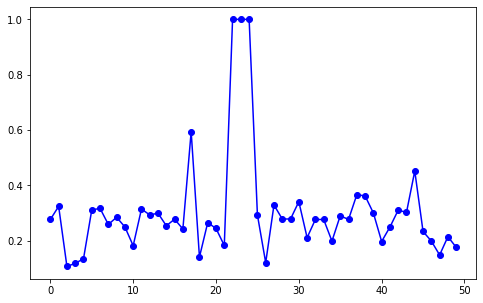

In [2]:
enhanced_df.insert(0, 'New_ID', range(0,len(enhanced_df)))
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))  # Set the figure size if needed
plt.plot(enhanced_df['New_ID'], enhanced_df['prompt.jailbreak_similarity'], marker='o', linestyle='-', color='b')